In [20]:
import numpy as np
import matplotlib.pyplot as plt
import math
from scipy.stats import gaussian_kde
from PIL import Image

In [2]:
# FUNCTION DEFINITIONS

def cr(num,l,r,t,b,):
    img = Image.open('mp4_images/' + str(num) + '.jpg')
#     img = cv2.imshow('mp4_images/' + str(num) + '.jpg')
    w,h = img.size
    img = img.crop((l,t,r,b))
    return img

im1 = cr(1,370,620,350,800)
im2 = cr(2,380,620,350,790)
im3 = cr(3,400,660,380,810)
im4 = cr(4,370,610,380,790)
im5 = cr(5,370,640,440,620)
im6 = cr(6,370,640,430,590)
im7 = cr(7,400,600,400,750)
im8 = cr(8,440,650,400,750)
im9 = cr(9,380,620,360,560)
im10 = cr(10,340,595,400,620)
im11 = cr(11,370,670,530,830)
im12 = cr(12,360,650,520,830)
im13 = cr(13,380,640,720,820)
im14 = cr(14,355,655,780,900)
im15 = cr(15,340,670,540,960)
im16 = cr(16,350,680,520,980)
im17 = cr(17,330,640,520,940)
im18 = cr(18,330,640,520,940)
im19 = cr(19,350,650,500,880)
im20 = cr(20,350,650,470,880)

im21 = cr(21,320,650,500,680)
im22 = cr(22,320,650,490,670)
im23 = cr(23,300,700,500,720)
im24 = cr(24,300,700,500,720)
im25 = cr(25,400,600,300,400)
im26 = cr(26,360,560,300,400)
im27 = cr(27,380,650,420,600)
im28 = cr(28,380,650,400,580)
im29 = cr(29,370,640,500,770)
im30 = cr(30,370,625,500,770)
im31 = cr(31,360,650,490,840)
im32 = cr(32,360,650,460,820)
im33 = cr(33,380,690,535,860)
im34 = cr(34,345,660,500,880)
im35 = cr(35,340,630,500,940)
im36 = cr(36,340,630,480,940)
im37 = cr(37,320,670,680,930)
im38 = cr(38,320,660,610,860)
im39 = cr(39,320,680,540,630)
im40 = cr(40,320,690,520,620)

crop_dict = {}
for each in range(1,41):
    crop_dict['im' + str(each)] = eval('im' + str(each))

In [3]:
def rgb_merge(image):
    rgb = []
    x = np.asarray(image)
    for i in range(0, image.height):
        for j in range(0, image.width):
            z = x[i][j].tolist()
            rgb.append(z)
    return rgb

def nRGB_merge(image):
    nRGB = []
    for each in rgb_merge(image):
        r,g,b = each
        if r == 0.0 and g == 0.0 and b == 0.0:
            R,G,B = r,g,b
        else:
            s = r + g + b
            R = r/s
            G = g/s
            B = b/s
        nRGB.append([R,G,B])
    return nRGB

def hsi_merge(image):
    hsi = []
    for each in rgb_merge(image):
        r,g,b = each
        if r == 0.0 and g == 0.0 and b == 0.0:
            H,S,I = r,g,b
        else:
            I = (r + g + b)/3
            num = (r-g)+(r-b)
            den = 2*(math.sqrt((r-g)**2+(r-b)*(g-b)))
            try:
                H = math.acos(num/den)
            except:
                H = 0
            try:
                S = 1 - 3*min(r,g,b)/I
            except:
                S = 0
        hsi.append([H*100,S*100,I*100])
    return hsi

def dict_merge1(func):
    """rgb_merge, nRGB_merge, hsi_merge"""
    d = {}
    for each_im in range(1,41):
        for each in func(crop_dict['im' + str(each_im)]):
            d[(my_round(each[0]), my_round(each[1]))] = d.get((my_round(each[0]), my_round(each[1])), 0) + 1
    return d

def dict_merge2(func):
    """rgb_merge, nRGB_merge, hsi_merge"""
    d = {}
    for each_im in range(1,41):
        for each in func(crop_dict['im' + str(each_im)]):
            d[(round(each[0], 1), round(each[1], 1), round(each[2], 1))] = d.get((round(each[0], 1), round(each[1], 1), round(each[2], 1)), 0) + 1
    return d

def dict_merge3(func):
    """rgb_merge, nRGB_merge, hsi_merge"""
    d = {}
    for each_im in range(1,41):
        for each in func(crop_dict['im' + str(each_im)]):
            d[(round(each[0], 1), round(each[1], 1))] = d.get((round(each[0], 1), round(each[1], 1)), 0) + 1
    return d

def d_percentage(dic1):
    d_perc = {}
    organized = sorted(dic1, key=dic1.get, reverse=True)
    to_sum = []
    sum_d = sum([*dic1.values()])
    lis1 = []
    for each in organized:
        lis1.append([each, dic1[each], dic1[each]/sum_d])
    return lis1

def my_round(x, base=25):
    return base * round(x/base)

def normalize_res(arr):
    """Values between 0 and 255 for image processing"""
    sensitivity = 255 * (arr - arr.min())
    arr = sensitivity / (arr.max() - arr.min())
    arr = arr.astype('uint8')
    return arr

In [4]:
d_rgb = dict_merge1(rgb_merge)

In [5]:
d_rgb_top = []
for each in d_percentage(d_rgb):
    if each[2] > .02:
        d_rgb_top.append(each[0])

In [6]:
d_nrgb = dict_merge1(nRGB_merge)

In [7]:
d_nrgb_top = []
for each in d_percentage(d_nrgb):
    if each[2] > .05:
        d_nrgb_top.append(each[0])

In [8]:
d_hsi = dict_merge1(hsi_merge)

In [9]:
d_hsi_top = []
for each in d_percentage(d_hsi):
    if each[2] > .01:
        d_hsi_top.append(each[0])

In [10]:
def final_test(file_name, color_space):
    img = Image.open(file_name)
    img_np = np.asarray(img)
    
    x = []
    y = 0
    if color_space.lower() == 'rgb':
        x = []
        for each in rgb_merge(img):
            if (my_round(each[0]), my_round(each[1])) in d_rgb_top:
                x.append(each)
            else:
                x.append([0,0,0])
        x = np.reshape(x,img_np.shape).astype('uint8')
        y = 1
    elif color_space.lower() == 'nrgb' or color_space.lower() == 'n-rgb':
        x = []
        for each in nRGB_merge(img):
            if (my_round(each[0]), my_round(each[1])) in d_rgb_top:
                x.append(each)
            else:
                x.append([0,0,0])
        x = np.reshape(x,img_np.shape).astype('uint8')
        y = 2
    elif color_space.lower() == 'hsi':
        x = []
        for each in hsi_merge(img):
            if (my_round(each[0]), my_round(each[1])) in d_hsi_top:
                x.append(each)
            else:
                x.append([0,0,0])
        x = np.reshape(x,img_np.shape).astype('uint8')
        y = 3
    return Image.fromarray(x)

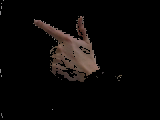

In [11]:
final_test('gun1.bmp', 'rgb')

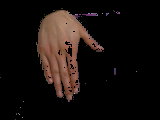

In [12]:
final_test('joy1.bmp', 'rgb')

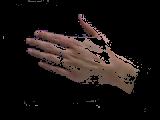

In [13]:
final_test('pointer1.bmp', 'rgb')

In [14]:
def hist2dgraph(string):
    
    color_space = []
    for each_im in range(1,41):
        if string == 'rgb':
            for each in rgb_merge(crop_dict['im' + str(each_im)]):
                color_space.append(each)
            plt.xlabel('Red')
            plt.ylabel('Green')
        elif string == 'nrgb' or string == 'n-rgb':
            for each in nRGB_merge(crop_dict['im' + str(each_im)]):
                color_space.append(each)
            plt.xlabel('Red')
            plt.ylabel('Green')
        elif string == 'hsi':
            for each in hsi_merge(crop_dict['im' + str(each_im)]):
                color_space.append(each)
            plt.xlabel('H')
            plt.ylabel('S')
    a = []
    b = []
    for each in color_space:
        a.append(each[0])
        b.append(each[1])
    # a,b = np.random.multivariate_normal([0,0], [[1,1],[1,2]], 10000).T
    plt.hist2d(a,b,bins=30,cmap='Reds')
    cb = plt.colorbar()

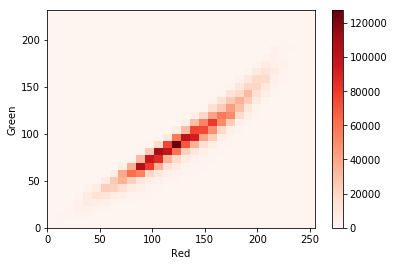

In [15]:
hist2dgraph('rgb')

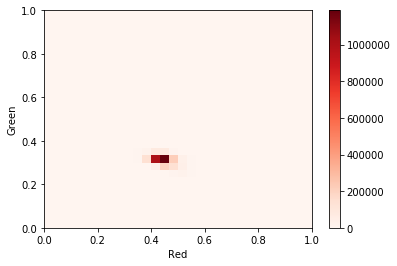

In [16]:
hist2dgraph('nrgb')

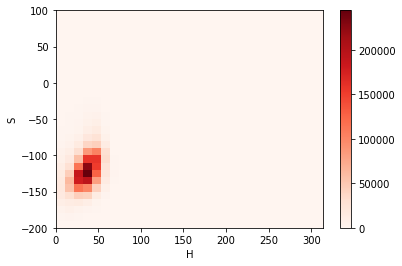

In [17]:
hist2dgraph('hsi')

In [25]:
def gaussian(string):
    
    color_space = []
    for each_im in range(1,41):
        if string == 'rgb':
            for each in rgb_merge(crop_dict['im' + str(each_im)]):
                color_space.append(each)
            plt.xlabel('Red')
            plt.ylabel('Green')
        elif string == 'nrgb' or string == 'n-rgb':
            for each in nRGB_merge(crop_dict['im' + str(each_im)]):
                color_space.append(each)
            plt.xlabel('Red')
            plt.ylabel('Green')
        elif string == 'hsi':
            for each in hsi_merge(crop_dict['im' + str(each_im)]):
                color_space.append(each)
            plt.xlabel('H')
            plt.ylabel('S')
    a = []
    b = []
    for each in color_space:
        a.append(each[0])
        b.append(each[1])
    
    data = np.vstack([a, b])
    kde = gaussian_kde(data)
    X, Y = np.meshgrid(np.linspace(0, 255, 40), np.linspace(0, 255, 40))
    Z = kde.evaluate(np.vstack([X.ravel(), Y.ravel()]))
    plt.imshow(Z.reshape(X.shape), origin='lower', aspect='auto', extent=[0, 255, 0, 255], cmap='Blues')
    cb = plt.colorbar()
    cb.set_label("density")

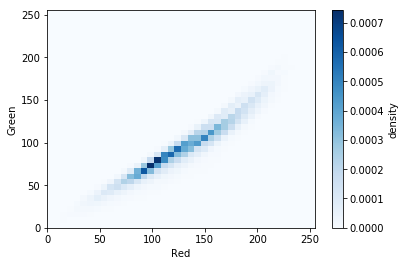

In [26]:
gaussian('rgb')